## Making SPEA algorithm for arbitrary unitaries
- This is an implementation of the Statistical Phase Estimation algorithm for arbitrary unitaries.
- It aims to provide the user one of the **eigenvector-eigenphase** pair of the given unitary matrix.
- The hardware structure is quite similar to that of the IPE algorithm and uses the circuit present in the last stage of the IPE algorithm.
- A scipy class called **unitary_group** is used for sampling a random basis for the algorithm
- The main thing that changes in this implementation is that the **cost and the phi is updated only once** at the end of the iterations and not in each of the iterations.
- **RANDOM UNITARIES**

In [1]:
from qiskit import QuantumCircuit,  Aer 
from qiskit.extensions import UnitaryGate,Initialize
from qiskit.quantum_info import Statevector 
from qiskit.tools.visualization import plot_bloch_multivector  
import numpy as np 
import sys 
from scipy.stats import unitary_group 
import matplotlib.pyplot as plt 
from qiskit import IBMQ 
%matplotlib inline 


In [2]:
sys.path.append("..")
from Modules.changed_SPEA import global_max_SPEA

- Run only if IBM credentials are loaded in this session

In [ ]:
# IBMQ.load_account()
# provider = IBMQ.get_provider(hub='??replace_with_your_hub_name??')

In [3]:
sim = Aer.get_backend('qasm_simulator')

## Testing the circuit
- We test our algorithm with the $X$ gate and the phase gate with $\theta = 1/5$

## X gate

In [4]:
U1 = UnitaryGate(data=np.array([[0,1],
                               [1,0]]))

In [5]:
spe = global_max_SPEA(U1,resolution= 30,error = 4,max_iters=12)

In [7]:
result = spe.get_eigen_pair(progress = False,backend=sim)

Maximum iterations reached for the estimation.
Terminating algorithm...


In [8]:
 result 

{'cost': 0.98046875,
 'theta': 0.04416049339610069,
 'state': array([0.73898226+0.18057756j, 0.58225653+0.28683496j])}

In [9]:
t = []
for resolution in range(10,50,5):
    spe = global_max_SPEA(U1,resolution= resolution,error = 4,max_iters=10)    
    res = spe.get_eigen_pair(backend = sim)
    theta = res['theta']
    t.append(theta)

Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...


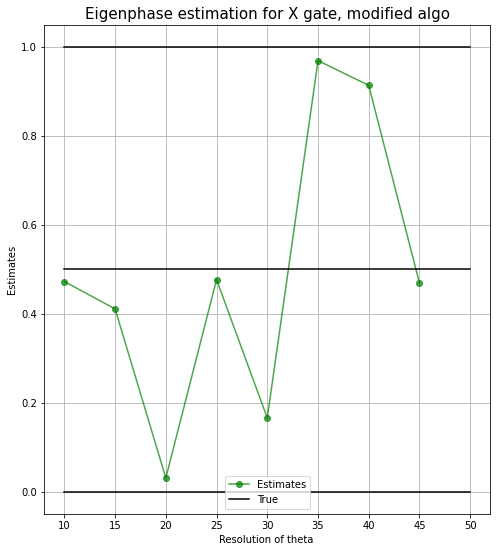

In [10]:
plt.figure(figsize = (8,9))
plt.title("Eigenphase estimation for X gate, modified algo",fontsize = 15)
plt.grid()
plt.plot(list(range(10,50,5)),t,marker = 'o',color='g',label = 'Estimates',alpha=0.7)
plt.plot([10,50],[0.5,0.5],color='black',label = "True")
plt.plot([10,50],[0,0],color='black')
plt.plot([10,50],[1,1],color='black')

plt.legend()
plt.xlabel("Resolution of theta ")
plt.ylabel("Estimates")
plt.savefig("Plots/SPE_PLOT1_global_max.jpg",dpi = 200)

## Phase Gate

In [12]:
u2 = UnitaryGate(data=np.array([[1,0],
                               [0, np.exp(2*np.pi*1j*(1/5))]]))

In [13]:
t = []
for resolution in range(10,50,5):
    spe = global_max_SPEA(u2,resolution= resolution,error = 4,max_iters=10)    
    res = spe.get_eigen_pair(backend = sim)
    theta = res['theta']
    t.append(theta)

Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...
Maximum iterations reached for the estimation.
Terminating algorithm...


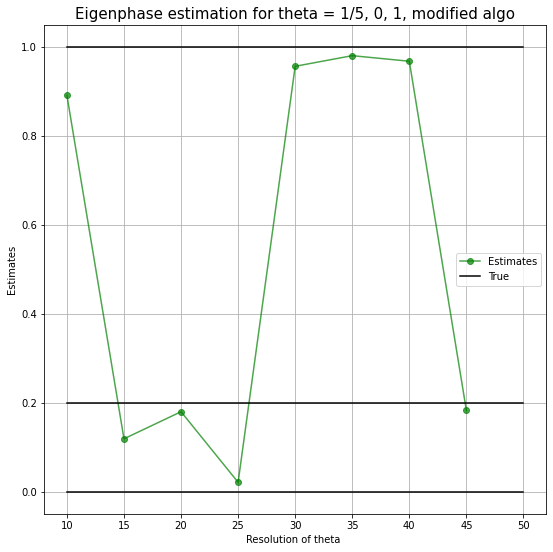

In [14]:
plt.figure(figsize = (9,9))
plt.title("Eigenphase estimation for theta = 1/5, 0, 1, modified algo",fontsize = 15)
plt.grid()
plt.plot(list(range(10,50,5)),t,marker = 'o',color='g',label = 'Estimates',alpha=0.7)
plt.plot([10,50],[0.2,0.2],color='black',label = "True")
plt.plot([10,50],[0,0],color='black')
plt.plot([10,50],[1,1],color='black')

plt.legend()
plt.xlabel("Resolution of theta ")
plt.ylabel("Estimates")
plt.savefig("Plots/SPE_PLOT2_global_max.jpg",dpi = 200)

## Trying out decompostion for arbitary matrices
- Using the **unitary_group** class of scipy, let us test for random unitary matrices and see how well the algorithm does
- We also use **np.eig** function to break down our unitary into its spectral decomposition and see how close our estimates actually are.

In [ ]:
unitary_group.rvs()

In [46]:
u_rand = unitary_group.rvs(2)
print("Random Unitary :",u_rand)

Random Unitary : [[-0.12321237-0.05141493j  0.7471276 -0.65113406j]
 [ 0.90278919-0.40883602j  0.00445762-0.13343505j]]


In [47]:
eigen_phases, eigen_vectors = np.linalg.eig(u_rand)
print("Eigen states of Unitary :",eigen_vectors)
eigen_phases = np.angle(eigen_phases)
ep = []
for k in eigen_phases:
    if k < 0:
        ep.append(k + 2*np.pi)
    else:
        ep.append(k)
eigen_phases = ep
print("Eigen phases of unitary :",eigen_phases)

Eigen states of Unitary : [[ 0.73359905+0.j          0.67237094-0.09874083j]
 [-0.67237094-0.09874083j  0.73359905+0.j        ]]
Eigen phases of unitary : [2.680628296251287, 5.602067260307619]


- Let us define **Statevectors** for these eigenvectors and then try to visualize them on our Bloch Sphere

In [23]:
ev1 , ev2 = eigen_vectors[0] , eigen_vectors[1]
ev1 = ev1 / np.linalg.norm(ev1)
ev2 = ev2 / np.linalg.norm(ev2)

- Drawing both eigenvectors in a Quantum Circuit

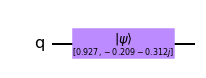

In [26]:
qc1 = QuantumCircuit(1)
qc2 = QuantumCircuit(1)
sv1 = Initialize(ev1)
sv2 = Initialize(ev2)
qc1 = qc1.compose(sv1,qubits = [0])
qc2 = qc2.compose(sv2,qubits = [0])
qc1.draw('mpl')

##### First

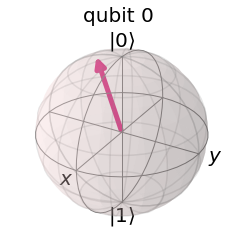

In [36]:
sv = Statevector.from_instruction(qc1)
plot_bloch_multivector(sv)

##### Second

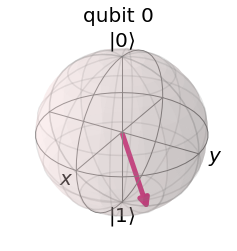

In [37]:
sv = Statevector.from_instruction(qc2)
plot_bloch_multivector(sv)

- Now, let us call our SPEA algorithm on the defined unitary and see which eigenvector does it produce

In [38]:
spea = global_max_SPEA(resolution = 50, max_iters = 10, unitary = u_rand,error = 4)
result = spea.get_eigen_pair(progress = False, randomize = True)
print("Result of our estimation :",result)

Result of our estimation : {'cost': 0.923828125, 'theta': 0.9093238945932393, 'state': array([ 0.13807685+0.95378008j, -0.1065769 -0.24470329j])}


- Let us plot our state on the Bloch Sphere

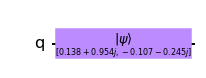

In [42]:
res_state = result['state']
res_state = res_state/ np.linalg.norm(res_state)
qc_res = QuantumCircuit(1)
sv_init = Initialize(res_state)
qc_res = qc_res.compose(sv_init, qubits = [0])
qc_res.draw('mpl')

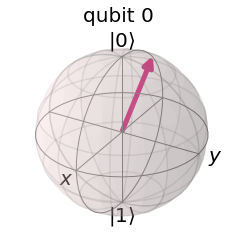

In [43]:
statevector_res = Statevector.from_instruction(qc_res)
plot_bloch_multivector(statevector_res)

## Let us do this for 5 random unitary matrices
- Let us make 5 random matrices 
- Now, for each matrix let's calculate the eigenvectors and the eigenvalues
- Now, pass that matrix into your algorithm and find the estimate
- Find which of the eigenvector overlaps with it the most and take that eigenvector and the returned vector and plot their overlap to show how good the algorithm is
- Also, plot the difference in the theta values for that particular measurement

In [75]:
def generate_random_estimation(experiments=5,resolution = 40):
    sim = Aer.get_backend('qasm_simulator')
    best_costs, errors_in_phases = [] , [] 
    for exp in range(experiments):
        u_rand = unitary_group.rvs(2)

        # generate the phases and vectors 
        eigen_phases, eigen_vectors = np.linalg.eig(u_rand)
        eigen_phases = np.angle(eigen_phases)
        ep = []
        # doing this as phase maybe be negative 
        for k in eigen_phases:
            if k < 0:
                ep.append((k + 2*np.pi)/(2*np.pi))
            else:
                ep.append(k/(2*np.pi))
        eigen_phases = ep
        
        ev1 , ev2 = eigen_vectors[0] , eigen_vectors[1]
        ev1 = ev1 / np.linalg.norm(ev1)
        ev2 = ev2 / np.linalg.norm(ev2)
        
        # generate their corresponding init statevectors 
        sv1 = Initialize(ev1)
        sv2 = Initialize(ev2)
        print("Eigenvectors",ev1,ev2)
        print("Eigenphases",eigen_phases)
        
        # run the algorithm 
        spea = global_max_SPEA(resolution = resolution, max_iters = 10, unitary = u_rand,error = 4)
        result = spea.get_eigen_pair(backend = sim, progress = False, randomize = True)
        
        # get the results 
        res_state = result['state']
        res_theta = result['theta']
        sv_res = Initialize(res_state)
        print("Result",result)
        print("Phase returned(0-> 2*pi) :",res_theta)
        
        # get the dot products 
        d1 = np.linalg.norm(np.dot(ev1, res_state.conjugate().T))**2 
        d2 = np.linalg.norm(np.dot(ev2, res_state.conjugate().T))**2 
    
        # make a bloch sphere
        qc = QuantumCircuit(2)
        qc = qc.compose(sv_res,qubits = [0])
        if d1 > d2:
            print(" Best overlap :",d1)
            # it is closer to the first
            qc = qc.compose(sv1,qubits = [1])
            best_costs.append(result['cost'])
            errors_in_phases.append(abs(res_theta - eigen_phases[0]))
        else:
            # it is closer to the second
            print(" Best overlap :",d2)
            qc = qc.compose(sv2,qubits = [1])
            best_costs.append(result['cost'])
            errors_in_phases.append(abs(res_theta - eigen_phases[1]))
        print("Bloch Sphere for the states...")
        s = Statevector.from_instruction(qc)
        display(plot_bloch_multivector(s))
    
    plt.title("Experiments for Random Matrices",fontsize= 16)
    plt.xlabel("Experiment Number")
    plt.ylabel("Metric value")
    plt.plot([i for i in range(experiments)], best_costs, label = 'Best Costs', alpha = 0.5, color = 'g',marker='o')
    plt.plot([i for i in range(experiments)], errors_in_phases, label = 'Corresponding Error in Phase', alpha = 0.5, color = 'b',marker='s') 
    plt.legend()
    plt.grid()
    return 

Eigenvectors [0.81062649+0.j         0.1235126 +0.57238915j] [-0.1235126 +0.57238915j  0.81062649+0.j        ]
Eigenphases [0.7189351651977642, 0.5450605800448336]
Maximum iterations reached for the estimation.
Terminating algorithm...
Result {'cost': 0.97265625, 'theta': 0.6907051282051282, 'state': array([ 0.27207797+0.49614421j, -0.79941475-0.20186767j])}
Phase returned(0-> 2*pi) : 0.6907051282051282
 Best overlap : 0.6969817039630409
Bloch Sphere for the states...


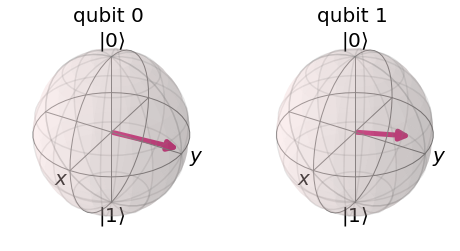

Eigenvectors [0.95822464+0.j         0.28248247+0.04482393j] [-0.28248247+0.04482393j  0.95822464+0.j        ]
Eigenphases [0.24817886669105133, 0.7025838208534712]
Maximum iterations reached for the estimation.
Terminating algorithm...
Result {'cost': 0.986328125, 'theta': 0.7043770032051282, 'state': array([0.13111065+0.00246204j, 0.95758966+0.25656575j])}
Phase returned(0-> 2*pi) : 0.7043770032051282
 Best overlap : 0.8328145134055797
Bloch Sphere for the states...


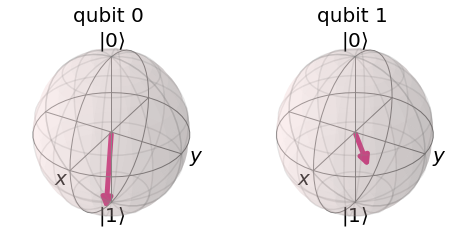

Eigenvectors [ 0.80828715+0.j        -0.57600236+0.1220376j] [0.57600236+0.1220376j 0.80828715+0.j       ]
Eigenphases [0.24688229464462955, 0.4377490368824987]
Maximum iterations reached for the estimation.
Terminating algorithm...
Result {'cost': 0.791015625, 'theta': 0.5851111778846154, 'state': array([-0.7164338 -0.00558182j,  0.58110906+0.38600999j])}
Phase returned(0-> 2*pi) : 0.5851111778846154
 Best overlap : 0.8398310287497244
Bloch Sphere for the states...


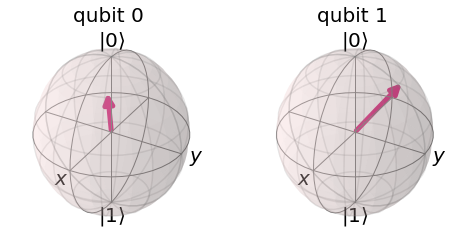

Eigenvectors [ 0.80760687+0.j         -0.5310432 -0.25644546j] [0.5310432 -0.25644546j 0.80760687+0.j        ]
Eigenphases [0.5145751810508744, 0.7506687230328075]
Maximum iterations reached for the estimation.
Terminating algorithm...
Result {'cost': 0.99609375, 'theta': 0.5436698717948717, 'state': array([0.258223  +0.84448273j, 0.38625994+0.26640768j])}
Phase returned(0-> 2*pi) : 0.5436698717948717
 Best overlap : 0.5867121392311413
Bloch Sphere for the states...


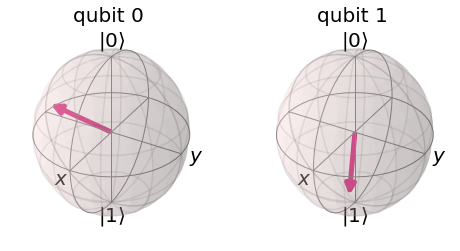

Eigenvectors [ 0.91858374+0.j         -0.34588833+0.19122021j] [0.34588833+0.19122021j 0.91858374+0.j        ]
Eigenphases [0.9947595968100265, 0.5747757837516287]
Maximum iterations reached for the estimation.
Terminating algorithm...
Result {'cost': 0.9765625, 'theta': 0.9512569223183129, 'state': array([-0.26445226+0.906005j  , -0.31526648+0.09913115j])}
Phase returned(0-> 2*pi) : 0.9512569223183129
 Best overlap : 0.7497795909100524
Bloch Sphere for the states...


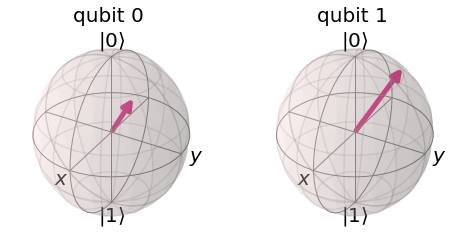

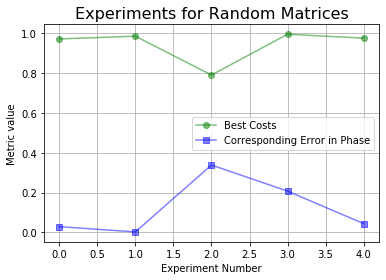

In [76]:
generate_random_estimation()